In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TFG/bitsDataset.csv")

In [ ]:
df

,Funcion,Clase,Bit 31,Bit 30,Bit 29,Bit 28,Bit 27,Bit 26,Bit 25,Bit 24,Bit 23,Bit 22,Bit 21,Bit 20,Bit 19,Bit 18,Bit 17,Bit 16,Bit 15,Bit 14,Bit 13,Bit 12,Bit 11,Bit 10,Bit 9,Bit 8,Bit 7,Bit 6,Bit 5,Bit 4,Bit 3,Bit 2,Bit 1,Bit 0
0,0,Dataset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Dataset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,Dataset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,Dataset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,4,Dataset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100663,1456381527,Complementario,0,1,0,1,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1
4100664,3194513099,Complementario,1,0,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,1,1
4100665,1127630112,Complementario,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4100666,4245509472,Complementario,1,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0


In [ ]:
bitsCols = []
for i in range(31,-1,-1):
  bitsCols.append('Bit {}'.format(i))

In [ ]:
X = df.loc[:, bitsCols]
Y = df.loc[:, 'Clase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

f1_scores1_data = []
f1_scores2_data = []
f1_scores3_data = []
f1_scores1 = []
f1_scores2 = []
f1_scores3 = []

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    clf1=MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf2=MLPClassifier(hidden_layer_sizes=(50,50, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    print('Valor del parametro', regul_param)
    y_train_pred1 = clf1.predict(X_train)
    y_train_pred2 = clf2.predict(X_train)
    y_test_pred1 = clf1.predict(X_test)
    y_test_pred2 = clf2.predict(X_test)

    f_train_1 = f1_score(y_train, y_train_pred1, average='micro')
    print('Entrenamiento 1', f_train_1)
    f_train_2 = f1_score(y_train, y_train_pred2, average='micro')
    print('Entrenamiento 2', f_train_2)
    f_test_1 = f1_score(y_test, y_test_pred1, average='micro')
    print('Test 1', f_test_1)
    f_test_2 = f1_score(y_test, y_test_pred2, average='micro')
    print('Test 2', f_test_2)
    f1_scores1_data.append(f_train_1)
    f1_scores2_data.append(f_train_2) 
    f1_scores1.append(f_test_1)
    f1_scores2.append(f_test_2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored

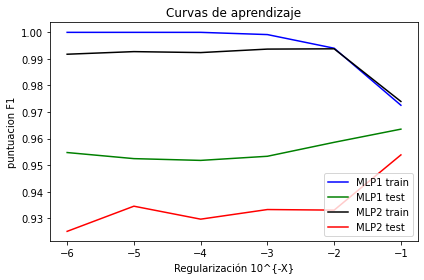

In [ ]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el
plt.plot(np.log10(regul_param_range), f1_scores1_data, color="blue", label="MLP1 train")
plt.plot(np.log10(regul_param_range), f1_scores1, color="g", label="MLP1 test")
plt.plot(np.log10(regul_param_range), f1_scores2_data, color="black", label="MLP2 train")
plt.plot(np.log10(regul_param_range), f1_scores2, color="r", label="MLP2 test")


# Creamos el gráfico
plt.title("Curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("puntuacion F1"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import numpy as np


regul_param = 10.0 ** -1

MLP=MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())

In [ ]:
y_test_pred = MLP.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                precision    recall  f1-score   support

Complementario       0.97      0.96      0.97    676943
       Dataset       0.97      0.97      0.97    676278

      accuracy                           0.97   1353221
     macro avg       0.97      0.97      0.97   1353221
  weighted avg       0.97      0.97      0.97   1353221



In [ ]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta correcta',
           xlabel='Etiqueta predicha')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if normalize:
        title+= 'normalizada'
    plt.savefig(title+'.pdf')
    return ax


Matriz de confusión sin normalizar
[[653240  23703]
 [ 18670 657608]]
Matriz de confusión normalizada
[[0.96498524 0.03501476]
 [0.02760699 0.97239301]]


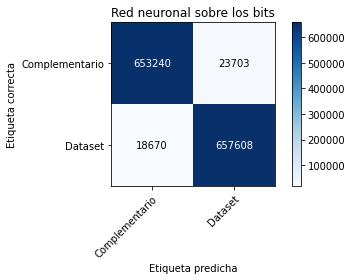

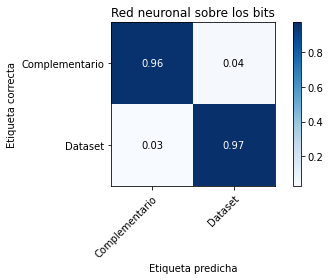

In [ ]:
plot_confusion_matrix(y_test, y_test_pred, normalize = False, title='Red neuronal sobre los bits')
plot_confusion_matrix(y_test, y_test_pred, normalize = True, title='Red neuronal sobre los bits')

In [ ]:
for coef in MLP.coefs_[0].T:
  print(coef)

MLP.coefs_[0].shape

[ 2.63144962e-009 -1.15570496e-014 -1.22001243e-009 -2.18494418e-005
 -3.35643382e-009  1.93281211e-007 -5.93621150e-012  1.29735876e-005
 -3.67436067e-006  4.67352685e-015 -2.82570697e-014 -7.79918131e-006
 -2.03846260e-012  1.34817949e-015 -2.59734193e-013 -1.17729581e-006
 -2.83658805e-013  2.39892435e-016 -2.29307907e-004 -2.79291714e-010
 -6.47098452e-012 -7.81150363e-007  4.28211018e-010  4.74485625e-014
 -1.80519026e-011 -9.79059315e-011  2.85933372e-014  6.81358964e-011
 -1.29664965e-009 -2.69972291e-319 -1.89569929e-009 -1.20692256e-011]
[ 4.23768870e-03 -3.22206021e-04 -1.07596927e-02  5.74763816e-03
  2.14745071e-01 -2.78119672e-01 -2.08188206e-01  2.88423143e-01
  6.70887650e-03  6.50822427e-03 -1.34304906e-04 -6.03239849e-03
 -2.11906625e-01  2.82176280e-01  1.99844773e-01 -2.89840046e-01
  8.08975568e-03  6.79681317e-04 -2.33217267e-03 -2.49011600e-03
  2.18052672e-01 -2.72775574e-01 -1.99664603e-01  2.83820963e-01
  6.13844552e-03  1.53571247e-03 -7.05644004e-03 -9.69576

(32, 200)

Prueba con datos de Clique con K = 4 (cadenas difíciles)

In [ ]:
XClique = pd.read_csv("/content/drive/MyDrive/TFG/salidaMuestraDificilK4.csv")

In [ ]:
XClique

,Bit 0,Bit 1,Bit 2,Bit 3,Bit 4,Bit 5,Bit 6,Bit 7,Bit 8,Bit 9,Bit 10,Bit 11,Bit 12,Bit 13,Bit 14,Bit 15,Bit 16,Bit 17,Bit 18,Bit 19,Bit 20,Bit 21,Bit 22,Bit 23,Bit 24,Bit 25,Bit 26,Bit 27,Bit 28,Bit 29,Bit 30,Bit 31
0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,1,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1
2,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,1,1
3,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90199,1,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1
90200,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
90201,1,0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
90202,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1


In [ ]:
YClique = MLP.predict(XClique)

In [ ]:
YClique

array(['Dataset', 'Complementario', 'Complementario', ...,
       'Complementario', 'Complementario', 'Complementario'], dtype='<U14')

In [ ]:
np.sum(YClique == 'Complementario')/len(YClique)

0.6443616691055829

Prueba con datos de Paridad (cadenas difíciles)

In [ ]:
XParidad = pd.read_csv("/content/drive/MyDrive/TFG/muestrasDificilsalidaParidad.csv")

In [ ]:
XParidad

,Bit 0,Bit 1,Bit 2,Bit 3,Bit 4,Bit 5,Bit 6,Bit 7,Bit 8,Bit 9,Bit 10,Bit 11,Bit 12,Bit 13,Bit 14,Bit 15,Bit 16,Bit 17,Bit 18,Bit 19,Bit 20,Bit 21,Bit 22,Bit 23,Bit 24,Bit 25,Bit 26,Bit 27,Bit 28,Bit 29,Bit 30,Bit 31
0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0
1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0
2,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0
3,1,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1,1
99996,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1
99997,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1
99998,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
YParidad = MLP.predict(XParidad)

In [ ]:
YParidad

array(['Complementario', 'Dataset', 'Complementario', ..., 'Dataset',
       'Dataset', 'Dataset'], dtype='<U14')

In [ ]:
np.sum(YParidad == 'Complementario')/len(YParidad)

0.29102

Prueba con Set Cover 7 conjuntos 3 elementos

In [ ]:
XSetCover = pd.read_csv("/content/drive/MyDrive/TFG/muestrasDificilsalidaSetCoverMin1.csv")

In [ ]:
XSetCover.shape

(140998, 32)

In [ ]:
YSetCover = MLP.predict(XSetCover)

In [ ]:
np.sum(YSetCover == 'Complementario')/len(YSetCover)

0.7802522021588959

Prueba con mayoria

In [ ]:
Xmayoria = pd.read_csv("/content/drive/MyDrive/TFG/muestrasDificilsalidaMayoria.csv")

In [ ]:
Xmayoria.shape

(196505, 32)

In [ ]:
Ymayoria = MLP.predict(Xmayoria)

In [ ]:
np.sum(Ymayoria == 'Complementario')/len(Ymayoria)

0.2245591715223531

Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=333).fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                precision    recall  f1-score   support

Complementario       0.66      0.66      0.66    676943
       Dataset       0.66      0.66      0.66    676278

      accuracy                           0.66   1353221
     macro avg       0.66      0.66      0.66   1353221
  weighted avg       0.66      0.66      0.66   1353221



In [ ]:
bitsLabels = []
for i in range(31,-1,-1):
  bitsLabels.append('Bit {:05b}'.format(i))

In [ ]:
df.loc[[1,2,3], ['Bit 31']]
X.loc[np.where(Y == 'Dataset')[0],:]

,Bit 31,Bit 30,Bit 29,Bit 28,Bit 27,Bit 26,Bit 25,Bit 24,Bit 23,Bit 22,Bit 21,Bit 20,Bit 19,Bit 18,Bit 17,Bit 16,Bit 15,Bit 14,Bit 13,Bit 12,Bit 11,Bit 10,Bit 9,Bit 8,Bit 7,Bit 6,Bit 5,Bit 4,Bit 3,Bit 2,Bit 1,Bit 0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050329,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2050330,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2050331,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
2050332,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


Árboles de decisión

In [ ]:
train_f1 = [] #Aquí se guardarán la f1 de los datos de entrenamiento para cada árbol
test_f1 = [] #Aquí se guardarán la f1 de los datos de prueba para cada árbol


#Para cada valor entre 1 y 15 creamos un árbol de decisión de esta profundidad
max_depths = range(15,33)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=0.005, random_state= 0)
    # Entrenamos el árbol con los datos de training
    clf = clf.fit(X_train, y_train)
    # Vemos las predicciones que hace para ambos conjuntos de datos
    y_test_predicted =clf.predict(X_test)
    y_train_predicted = clf.predict(X_train)
    
    #Calculamos y guardamos la f1 para los conjuntos de datos en función de las predicciones anteriores
    test_f1.append(f1_score(y_test, y_test_predicted, average = 'micro'))
    train_f1.append(f1_score(y_train, y_train_predicted, average = 'micro'))


hecho


([0.8518579005203141], [0.852381137834506])

In [ ]:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=32, min_samples_split=0.005, random_state= 0)
    # Entrenamos el árbol con los datos de training
    clf = clf.fit(X_train, y_train)
    # Vemos las predicciones que hace para ambos conjuntos de datos
    y_test_predicted =clf.predict(X_test)
    y_train_predicted = clf.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

                precision    recall  f1-score   support

Complementario       0.86      0.84      0.85    676943
       Dataset       0.85      0.86      0.85    676278

      accuracy                           0.85   1353221
     macro avg       0.85      0.85      0.85   1353221
  weighted avg       0.85      0.85      0.85   1353221



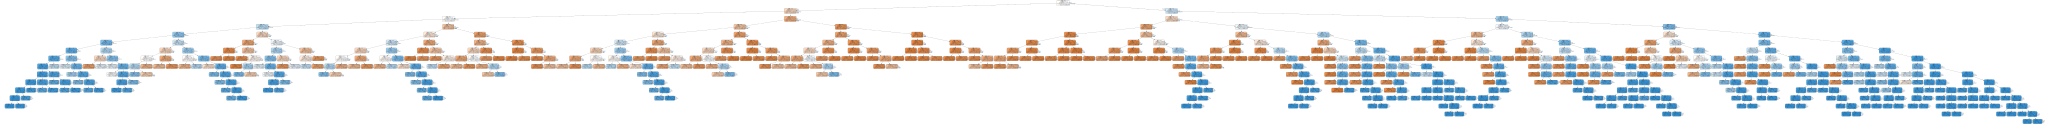

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file = None, feature_names = X.axes[1], class_names =clf.classes_, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render('arbolDecisionBits',view=True)
graph

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=32, min_samples_split=0.05, random_state= 0)
clf = clf.fit(X, Y)

In [ ]:
y_test_predicted =clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

                precision    recall  f1-score   support

Complementario       0.76      0.69      0.72    676943
       Dataset       0.72      0.79      0.75    676278

      accuracy                           0.74   1353221
     macro avg       0.74      0.74      0.74   1353221
  weighted avg       0.74      0.74      0.74   1353221



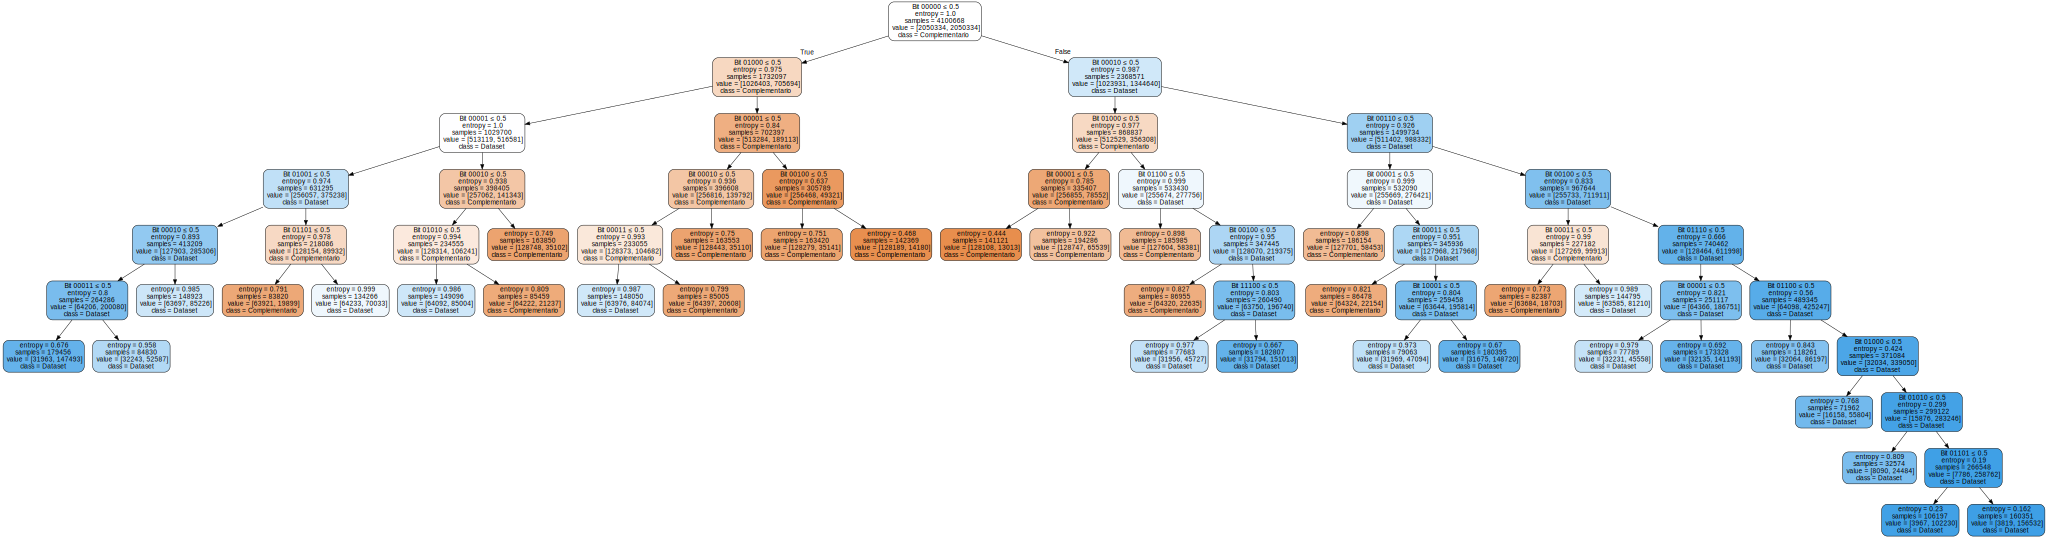

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file = None, feature_names = bitsLabels, class_names =clf.classes_, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render('arbolDecisionBitsTotalTrainProfundo',view=True)
graph